In [1]:
import pandas as pd
import numpy as np


eeg_data = pd.read_csv("../data/sample_output/saved_new_data.csv")

eeg_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.5,508.75,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.5,-175.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.0,-769.50,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.5,-1075.25,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.0,-954.25,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75


In [2]:
# filtering EEG Signals with different types of filters
from scipy.signal import butter, lfilter, filtfilt, iirnotch


In [3]:
fs = 256 # Sampling rate in Hz
lowcut = 0.5 # High-pass filter cutoff frequency
highcut = 40 # Low-pass filter cutoff frequency
notch_freq = 50 # Notch Frequency
notch_quality = 30.0 # Quality factor for notch filter

In [4]:
# Design a Butterworth filter which serves as a bandpass filter
def butter_filter(data, lowcut, highcut, fs, order=5, btype="band"):
    nyquist = 0.5 * fs
    low = lowcut/nyquist
    high = highcut/nyquist
    b, a = butter(order, [low,high], btype=btype)
    y = filtfilt(b, a, data)
    return y

In [5]:
def apply_notch_filter(data, freq, fs, quality):
    w0 = freq / (0.5 * fs)
    b, a = iirnotch(w0, quality)
    y = filtfilt(b, a, data)
    return y


In [6]:
# dropping off Unnamed column
eeg_data = eeg_data.drop(columns="Unnamed: 0")

In [7]:
# Example mapping: Adjust according to your actual electrode layout
channel_map = {
    '0': 'Fp1', '1': 'Fpz', '2': 'Fp2', '3': 'F7', '4': 'F3', '5': 'Fz', '6': 'F4', '7': 'F8',
    '8': 'FC5', '9': 'FC1', '10': 'FC2', '11': 'FC6', '12': 'M1', '13': 'T7', '14': 'C3', '15': 'Cz',
    '16': 'C4', '17': 'T8', '18': 'M2', '19': 'CP5', '20': 'CP1', '21': 'CP2', '22': 'CP6', '23': 'P7',
    '24': 'P3', '25': 'Pz', '26': 'P4', '27': 'P8', '28': 'POz', '29': 'O1', '30': 'Oz', '31': 'O2',
    '32': 'AF7', '33': 'AF3', '34': 'AF4', '35': 'AF8', '36': 'F5', '37': 'F1', '38': 'F2', '39': 'F6',
    '40': 'FT7', '41': 'FC3', '42': 'FC4', '43': 'FT8', '44': 'TP7', '45': 'C5', '46': 'C1', '47': 'C2',
    '48': 'C6', '49': 'TP8', '50': 'CP3', '51': 'CP4', '52': 'P5', '53': 'P1', '54': 'P2', '55': 'P6',
    '56': 'PO5', '57': 'PO3', '58': 'PO4', '59': 'PO6', '60': 'CB1', '61': 'CB2', '62': 'S1', '63': 'S2'
}

# Rename channels
eeg_data.rename(columns=channel_map, inplace=True, index=None)

In [8]:
eeg_data

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P2,P6,PO5,PO3,PO4,PO6,CB1,CB2,S1,S2
0,609.75,594.50,593.00,563.25,555.50,547.00,518.50,519.50,508.75,563.25,...,140.25,108.50,105.50,113.50,112.75,69.00,89.75,51.75,-8178.75,-8179.50
1,-230.75,-167.75,-170.50,-221.75,-203.50,-202.50,-174.00,-181.50,-175.25,-224.25,...,-688.00,-650.25,-640.50,-683.75,-675.50,-836.50,-669.75,-867.25,-8175.75,-8176.50
2,-941.75,-840.50,-829.50,-876.00,-845.50,-845.75,-771.25,-780.00,-769.50,-882.75,...,-1216.75,-1142.50,-1133.25,-1198.50,-1195.25,-1407.75,-1165.50,-1440.50,-8172.75,-8173.25
3,-1284.25,-1189.50,-1183.75,-1209.25,-1166.75,-1163.25,-1083.50,-1058.50,-1075.25,-1227.75,...,-1400.25,-1305.50,-1291.00,-1360.50,-1359.25,-1579.50,-1309.25,-1600.25,8191.75,-2930.25
4,-1145.50,-1077.25,-1066.75,-1066.25,-1029.75,-1027.50,-958.75,-944.00,-954.25,-1086.50,...,-896.25,-836.75,-821.25,-862.50,-861.75,-967.00,-821.50,-974.00,8191.75,8191.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,-1041.75,-958.75,-945.25,-965.50,-921.50,-923.25,-833.50,-846.75,-819.25,-983.50,...,-1225.50,-1152.25,-1142.25,-1191.00,-1182.25,-1348.75,-1172.50,-1487.00,-8171.25,-8179.00
5001,-1177.50,-1118.25,-1105.00,-1101.50,-1067.00,-1070.75,-969.25,-964.00,-959.25,-1145.75,...,-1035.00,-976.25,-963.50,-1012.25,-1009.25,-1131.25,-985.75,-1255.25,8191.75,8191.75
5002,-695.25,-705.25,-691.25,-651.25,-634.00,-635.25,-566.00,-564.50,-565.75,-700.25,...,-465.00,-447.50,-438.75,-465.00,-462.25,-483.25,-454.75,-597.00,8191.75,8191.75
5003,54.50,-31.50,-30.00,42.00,33.50,33.50,45.50,63.50,49.75,-3.00,...,415.75,369.75,374.75,415.50,412.50,552.75,381.75,454.25,8191.75,8190.75


In [37]:
import mne
# Select only the columns that are actually mapped (ignores unmapped channels)
channels_to_use = [channel for channel in channel_map.values() if channel in eeg_data.columns]

# Create an MNE Info object with the channels that we have data for
info = mne.create_info(ch_names=channels_to_use, sfreq=1000, ch_types='eeg')

# Create the RawArray with the data from the channels we are using
raw = mne.io.RawArray(eeg_data[channels_to_use].T.to_numpy(), info)

# Define the montage (electrode positions)
montage = mne.channels.make_standard_montage('standard_1020')

# Set the montage, ignoring channels that are not present in the montage
raw.set_montage(montage, on_missing='ignore')

# Visualize the data
raw.plot_psd(fmax=50)  # Showing PSD up to 50 Hz
# raw.plot_projs_topomap()  # Topomap

Creating RawArray with float64 data, n_channels=64, n_times=5005
    Range : 0 ... 5004 =      0.000 ...     5.004 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_25556/4059889766.py:18: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(fmax=50)  # Showing PSD up to 50 Hz
/home/testys/anaconda3/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<MNELineFigure size 1000x350 with 2 Axes>

In [9]:
filtered_data = butter_filter(eeg_data.values, lowcut, highcut, fs, order=5, btype="band")

In [10]:
filtered_data = apply_notch_filter(filtered_data, notch_freq, fs, notch_quality)

In [11]:
filtered_data

array([[  426.61041907,   479.03537012,   527.10042307, ...,
         5714.84579239,  3179.28758921,    42.19079111],
       [  393.44996673,   471.44682056,   540.33227233, ...,
         5112.47031223,  2844.3804346 ,    46.40569296],
       [  355.44608262,   448.91185608,   531.96807356, ...,
         4761.47541884,  2662.15965062,    76.4732094 ],
       ...,
       [ -419.92226535,  -485.58144752,  -538.02796938, ...,
        -6092.95697065, -3411.11034796,   -77.84529905],
       [ -393.60209164,  -489.89872136,  -565.89952933, ...,
        -5382.39287896, -3006.22401033,   -59.78100512],
       [ -359.92322289,  -472.77666775,  -563.48438116, ...,
        -4892.89387895, -2738.46688919,   -73.27760819]])

In [16]:
import mne
# Select only the columns that are actually mapped (ignores unmapped channels)
channels_to_use = [channel for channel in channel_map.values() if channel in eeg_data.columns]
print(channels_to_use)
# Create an MNE Info object with the channels that we have data for
info = mne.create_info(ch_names=channels_to_use, sfreq=1000, ch_types='eeg')

# Create the RawArray with the data from the channels we are using
raw = mne.io.RawArray(eeg_data[channels_to_use].T.to_numpy(), info)


['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FT7', 'FC3', 'FC4', 'FT8', 'TP7', 'C5', 'C1', 'C2', 'C6', 'TP8', 'CP3', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'CB1', 'CB2', 'S1', 'S2']
Creating RawArray with float64 data, n_channels=64, n_times=5005
    Range : 0 ... 5004 =      0.000 ...     5.004 secs
Ready.


In [18]:
raw.filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.4s finished


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,1.00 Hz
Lowpass,500.00 Hz


In [19]:
from mne.preprocessing import ICA

In [20]:
ica = ICA(n_components=15, random_state=97)
ica.fit(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components


/home/testys/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 27.5s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,1000 iterations on raw data (5005 samples)
ICA components,15
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


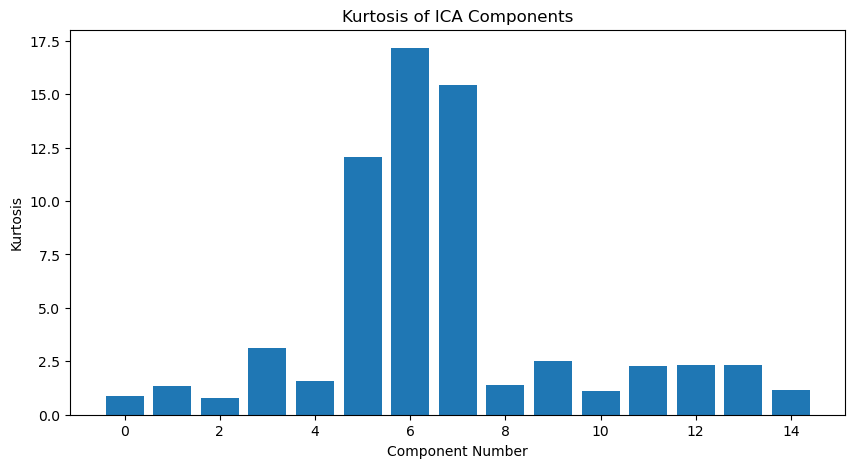

In [35]:
from scipy.stats import kurtosis
from matplotlib import pyplot as plt

# Calculate kurtosis for each component
kurtosis_vals = [kurtosis(ica.get_sources(raw).get_data()[i]) for i in range(ica.n_components_)]

# Plot the kurtosis values
plt.figure(figsize=(10, 5))
plt.bar(range(ica.n_components_), kurtosis_vals)
plt.title('Kurtosis of ICA Components')
plt.xlabel('Component Number')
plt.ylabel('Kurtosis')
plt.show()
